# **1. About Dataset:**

- COVID-19 Dataset --> https://www.kaggle.com/datasets/meirnizri/covid19-dataset

![](https://cdn.who.int/media/images/default-source/mca/mca-covid-19/coronavirus-2.tmb-479v.jpg?sfvrsn=4dba955c_12%20479w)

## **i. Problem Statement:**

- The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will **predict whether the patient is in high risk or not**.



## **ii. Features:**

- The dataset was provided by the Mexican government.
- The raw dataset consists of **21 unique features** and **1,048,576 unique patients**. 
- In the Boolean features, **1** means "**yes**" and **2** means "**no**". 
- Values as 97 and 99 are **missing data**.

  - **Sex**: female(1) or male(2)
  - **Age**: of the patient.
  - **Classification**: covid test findings. 
    - Values 1-3 mean that the patient was **diagnosed** with covid in different
    degrees. 
    - 4 or higher means that the patient is **not a carrier** of covid or that the test is inconclusive.
  - **Patient type**: hospitalized(1) or not hospitalized(2).
  - **Pneumonia**: Whether the patient already have air sacs inflammation(1) or not(2).
  - **Pregnancy**: Whether the patient is pregnant(1) or not(2).
  - **Diabetes**: Whether the patient has diabetes(1) or not(2).
  - **Copd**: Indicates whether the patient has Chronic obstructive pulmonary disease(1) or not(2).
  - **Asthma**: Whether the patient has asthma(1) or not(2).
  - **Inmsupr**: Whether the patient is immunosuppressed(1) or not(2).
  - **Hypertension**: Whether the patient has hypertension(1) or not(2).
  - **Cardiovascular**: Whether the patient has heart or blood vessels related disease(1) or not(2).
  - **Renal chronic**: Whether the patient has chronic renal disease(1) or not(2).
  - **Other disease**: Whether the patient has other disease(1) or not(2).
  - **Obesity**: Whether the patient is obese(1) or not(2).
  - **Tobacco**: Whether the patient is a tobacco(1) user or not(2).
  - **usmr**: Indicates Whether the patient treated medical units of the first, second or third level.
  - **Medical unit**: Type of institution of the National Health System that provided the care.
  - **Intubed**: Whether the patient was connected to the ventilator(1) or not(2).
  - **ICU**: Indicates whether the patient had been admitted to an Intensive Care Unit(1) or not(2).
  - **Date Died**: Indicates when the patient has died.

# **2. Data Exploration:**

In [ ]:
#!pip install matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)


In [ ]:
# Turn off warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tech4Dev/Databases/5. Machine Learning (ML)/Covid_Data.csv')
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,2,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,2,2,2,2,2,2,2,2,2,7,97


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [ ]:
# From the description of dataset, null values are replaced with 97 or 99
# This is a double check
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [ ]:
# Check Cardinality in Categorical Features

selected_columns = df.columns.drop(['AGE','DATE_DIED'])

unique_dic = []

for col in selected_columns:

  unique_num = len(df[col].unique())
  unique_dic.append({'Total_Unique' : unique_num,
                     'Cardinality%': (unique_num/1048575)*100})

unique_df = pd.DataFrame(unique_dic, index = selected_columns).sort_values(by = 'Cardinality%', ascending = False)
unique_df

,Total_Unique,Cardinality%
MEDICAL_UNIT,13,0.001240
CLASIFFICATION_FINAL,7,0.000668
ICU,4,0.000381
INTUBED,4,0.000381
PREGNANT,4,0.000381
HIPERTENSION,3,0.000286
TOBACCO,3,0.000286
RENAL_CHRONIC,3,0.000286
OBESITY,3,0.000286
CARDIOVASCULAR,3,0.000286


In [ ]:
# Check unique values for each feature

selected_columns = df.columns.drop('AGE')

for column in selected_columns:
    print('\n*-*-*-*-*-*\n')
    print(pd.DataFrame(df[column].value_counts()))



*-*-*-*-*-*

    USMER
2  662903
1  385672

*-*-*-*-*-*

    MEDICAL_UNIT
12        602995
4         314405
6          40584
9          38116
3          19175
8          10399
10          7873
5           7244
11          5577
13           996
7            891
2            169
1            151

*-*-*-*-*-*

      SEX
1  525064
2  523511

*-*-*-*-*-*

   PATIENT_TYPE
1        848544
2        200031

*-*-*-*-*-*

            DATE_DIED
9999-99-99     971633
06/07/2020       1000
07/07/2020        996
13/07/2020        990
16/06/2020        979
...               ...
24/11/2020          1
17/12/2020          1
08/12/2020          1
16/03/2021          1
22/04/2021          1

[401 rows x 1 columns]

*-*-*-*-*-*

    INTUBED
97   848544
2    159050
1     33656
99     7325

*-*-*-*-*-*

    PNEUMONIA
2      892534
1      140038
99      16003

*-*-*-*-*-*

    PREGNANT
97    523511
2     513179
1       8131
98      3754

*-*-*-*-*-*

    DIABETES
2     920248
1     124989
98      3338

*-*-*-

In [ ]:
# Check age (continous data) description
# Minimum = 0, Maximum = 121, Median = 40
df.AGE.describe()

count    1.048575e+06
mean     4.179410e+01
std      1.690739e+01
min      0.000000e+00
25%      3.000000e+01
50%      4.000000e+01
75%      5.300000e+01
max      1.210000e+02
Name: AGE, dtype: float64

In [ ]:
# We have 138 patient with age > 100 ie. 0.013% of our dataset 

df[df.AGE > 100].AGE.count()

138

- We have 138 patient with age > 100 ie. 0.013% of our dataset.
- Median (40) = Mean (41) wich means that age is normally distributed.
  - **So no need to drop it as outliers.**

**- Features with no null values:**
  - Sex
  - Age
  - Classification
  - Medical unit
  - Patient type
  - usmr

**- Features with null values:**

  - Pneumonia: 99 = 16003
  - Diabetes: 98 = 3338
  - Copd: 98 = 3003
  - Asthma: 98 = 2979
  - Inmsupr: 98 = 3404
  - Hypertension: 98 = 3104
  - Cardiovascular: 98 = 3076
  - Renal chronic: 98 = 3006
  - Other disease: 98 = 5045
  - Obesity: 98 = 3032
  - Tobacco: 98 = 3220

- Null values ranges from 3000 - 16000 ie. (0.2 - 1.5 % of total dataset)
- The highest number (16000) in pneumonea may be explained by the shoratge of radiological investigations.
- Being a categorical features, we will replace these missed data with the (Mode).

**- Features that show more than one type of null values:**
  - **Pregnancy: '97' = 523511, '98' = 3754**
    - We noticed that '97' count is = male count in our dataset
    - Sex: '2' = 523511
  - **Intubed: '97' = 848544, '99' = 7325**
    - We noticed that '97' count is = hospitalized count in our dataset
    - Patient type: '1' = 848544
  - **ICU: '97' = 848544, '99' = 7488**
    - We noticed that '97' count is = hospitalized count in our dataset
    - Patient type: '1' = 848544

- For pregnant category, males can't either be pregnant or not pregnant that why it appears like a null values, we will change the 97 values to 2 (non-pregnant), and fill the 98 with the mode.

- Applying the same concept to being in ICU or intubated, patient should be hospitalized. non hospitalized can't either be in ICU or not, or intubated or not.

- We think that the labeling of patient type is wrong, 1 should be for non hospitalized , 2 for hospitalized.

Visualization will confirm our opinion about these different null vlaues.




- **Date Died:**
  - We can see that most of data are (9999-99-99), ie. having no death date, the count of this value = 971633 ie. 92% of dataset, it can't be just dropped. 
  - So we considered this date as recovery ie. no death which is convinent as across the world, most patients recovered, this will be our label.
  - This also means that our dataset is imbalanced.
  - For **imbalance** we could use:
    - oversampling techniques, buy due to the very large dataset (1 Million), we can't use it.
    - Undersamping techniques resulted in very very low scores.

- **Classification:**
  - in our model, we will keep classes (1,2,3) as it is, cause it reflects the degree of infection, while changing all classes >= 4 into 0
  - We will make column of (covid Vs non covid) only for visualization


**-Types of our Features/label:**
  - We will deal with all features as categorical data
  - Except for classification, usmr --> Ordinal data
  - Age --> Numerical data as it is
  - For date, we will converted into Death(1) - no Death(2)



In [ ]:
# Check gender type when pregnancy = 97
# Gender = 2 ie. male

pregnant_male = df[df.PREGNANT == 97]
pregnant_male.SEX.value_counts()

2    523511
Name: SEX, dtype: int64

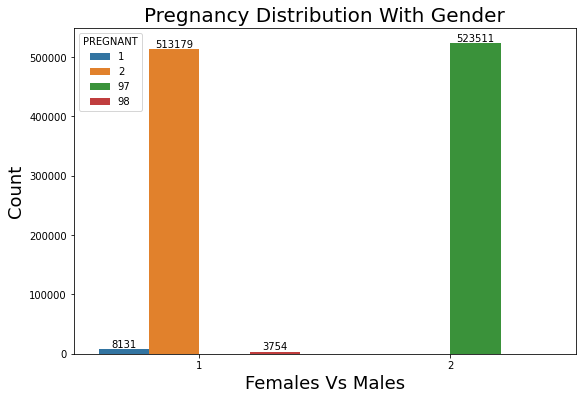

In [ ]:
# Count plot to figure out the different categories of pregnancy across gender.

plt.figure(figsize = (9,6))
ax = sns.countplot(df.SEX, hue = df.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)

plt.ylabel('Count', size = 18)
plt.xlabel('Females Vs Males', size = 18)
plt.title('Pregnancy Distribution With Gender', fontsize = 20);

In [ ]:
# Check patient type when intubation = 97
# Patient type = 1 ie. (Hospitalized)

intubed_type = df[df.INTUBED == 97]
intubed_type.PATIENT_TYPE.value_counts()

1    848544
Name: PATIENT_TYPE, dtype: int64

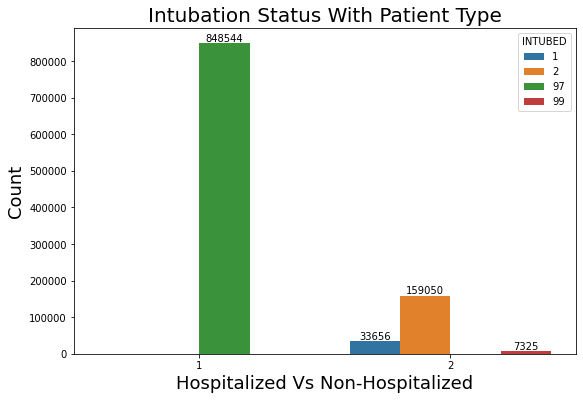

In [ ]:
# Count plot to figure out intubation among differnt patients (Hospitalized Vs Non-hospitalized)

plt.figure(figsize = (9,6))
ax = sns.countplot(df.PATIENT_TYPE, hue = df.INTUBED)
for bars in ax.containers:
    ax.bar_label(bars)

plt.ylabel('Count', size = 18)
plt.xlabel('Hospitalized Vs Non-Hospitalized', size = 18)
plt.title('Intubation Status With Patient Type', fontsize = 20);

In [ ]:
# Check patient type when ICU = 97
# Patient type = 1 ie. (Hospitalized)

icu_type = df[df.ICU == 97]
icu_type.PATIENT_TYPE.value_counts()

1    848544
Name: PATIENT_TYPE, dtype: int64

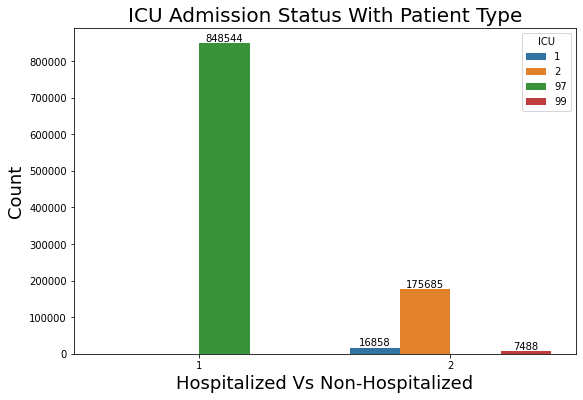

In [ ]:
# Count plot to figure out ICU admission among differnt patients (Hospitalized Vs Non-hospitalized)

plt.figure(figsize = (9,6))
ax = sns.countplot(df.PATIENT_TYPE, hue = df.ICU)
for bars in ax.containers:
    ax.bar_label(bars)

plt.ylabel('Count', size = 18)
plt.xlabel('Hospitalized Vs Non-Hospitalized', size = 18)
plt.title('ICU Admission Status With Patient Type', fontsize = 20);

**These graphs confirms our insights that:**

- Pregnant = 97 is when patient is male
- Intubed = 97 is when patient is hospitalized
- ICU = 97 is when patient is hospitalized

For 'INTUBED', 'ICU': It seems that the labeling of patient type in dataset description is wrong, as non hospitalized can't be in ICU or Intubated as shown in graph.

This means that datapoints where patient type = 1 is actually non-hospitalized patients and that's why their data is '97 ie. Null' as as non hospitalized can't be in ICU or Intubated as shown in graph.

This is further supported by the argument that most COVID-19 patients do not require an ICU.

 --> will Create new column for patient type with the correct labeling.


# **3. Data Cleaning:**

### **b. PREGNANT:**

In [ ]:
# Replace '97' in pregnant with '2' ie. when gender = male, pregnant = 2
# So that SEX and PREGNANT are independent variables.

df.PREGNANT = df.PREGNANT.replace(97, 2)
df.PREGNANT.value_counts()

2     1036690
1        8131
98       3754
Name: PREGNANT, dtype: int64

### **c. PATIENT_TYPE:**

In [ ]:
# Creating new column (PATIENT_HOSP) to correct the definitions
# PATIENT_HOSP = 1 (Hospitalized)
# PATIENT_HOSP = 1 (Non_hospitalized)

def change_type(val):
    if val == 1:
        return 2
    elif val == 2 : 
        return 1


df['PATIENT_HOSP'] = df['PATIENT_TYPE'].map(change_type)

df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,PATIENT_HOSP
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97,2
1,2,1,2,1,03/06/2020,97,1,72,2,2,2,2,2,1,2,2,1,1,2,5,97,2
2,2,1,2,2,09/06/2020,1,2,55,2,1,2,2,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97,2
4,2,1,2,1,21/06/2020,97,2,68,2,1,2,2,2,1,2,2,2,2,2,3,97,2


In [ ]:
df = df.drop('PATIENT_TYPE', axis = 1)

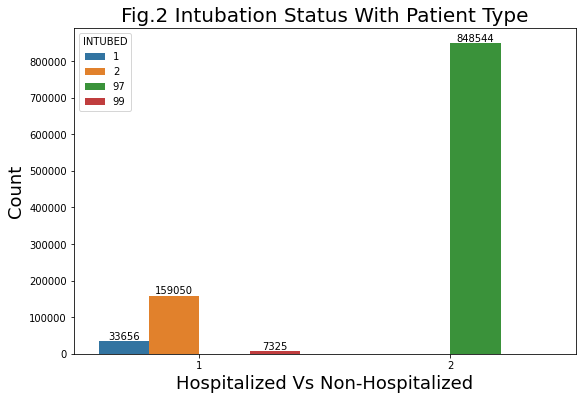

In [ ]:
# Ensure correct definnition of patient type

plt.figure(figsize = (9,6))
ax = sns.countplot(df.PATIENT_HOSP, hue = df.INTUBED)
for bars in ax.containers:
    ax.bar_label(bars)

plt.ylabel('Count', size = 18)
plt.xlabel('Hospitalized Vs Non-Hospitalized', size = 18)
plt.title('Fig.2 Intubation Status With Patient Type', fontsize = 20);

### **d. INTUBED:**

In [ ]:
# Replace '97' in Intubed with '2' ie. when patient not hospitalized, intubed = 2 (not-intubated)

df.INTUBED = df.INTUBED.replace(97, 2)
df.INTUBED.value_counts()

2     1007594
1       33656
99       7325
Name: INTUBED, dtype: int64

### **e. ICU**:

In [ ]:
# Replace '97' in ICU with '2' ie. when patient not hospitalized, intubed = 2 (not in ICU)

df.ICU = df.ICU.replace(97, 2)
df.ICU.value_counts()

2     1024229
1       16858
99       7488
Name: ICU, dtype: int64

### **f. CLASSIFICATION_FINAL**:

**- Classification:** covid test findings.
  - Values 1-3 mean that the patient was diagnosed with covid in different degrees.
  - 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.


- We will convert classes of >= 4 to 0 (No-covid), keeping (1,2,3) as it is. (Ordinal Data)

In [ ]:
df.CLASIFFICATION_FINAL.value_counts()

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

In [ ]:
# Replacing the non-covid patients with 0

df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([4,5,6,7], 0)
df.CLASIFFICATION_FINAL.value_counts()

0    656596
3    381527
1      8601
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

In [ ]:
# Creating new column for covid of Covid (1) , Non-covid (2) for visualization


def covid_diagnosis(val):
    if val == 0:
        return 2
    else : 
        return 1


df['COVID'] = df['CLASIFFICATION_FINAL'].map(covid_diagnosis)

df.head()

,USMER,MEDICAL_UNIT,SEX,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,PATIENT_HOSP,COVID
0,2,1,1,03/05/2020,2,1,65,2,2,2,2,2,1,2,2,2,2,2,3,2,2,1
1,2,1,2,03/06/2020,2,1,72,2,2,2,2,2,1,2,2,1,1,2,0,2,2,2
2,2,1,2,09/06/2020,1,2,55,2,1,2,2,2,2,2,2,2,2,2,3,2,1,1
3,2,1,1,12/06/2020,2,2,53,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2
4,2,1,2,21/06/2020,2,2,68,2,1,2,2,2,1,2,2,2,2,2,3,2,2,1


In [ ]:
df.COVID.value_counts()

2    656596
1    391979
Name: COVID, dtype: int64

### **a. DATE_DIED:**

In [ ]:
# Creating new column for type of Death (1), Recovery (2) based on DATE_DIED


def death_numbers(val):
    if val == '9999-99-99':
        return 0
    else : 
        return 1


df['DEATH'] = df['DATE_DIED'].map(death_numbers)

df.head()

,USMER,MEDICAL_UNIT,SEX,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,PATIENT_HOSP,COVID,DEATH
0,2,1,1,03/05/2020,2,1,65,2,2,2,2,2,1,2,2,2,2,2,3,2,2,1,1
1,2,1,2,03/06/2020,2,1,72,2,2,2,2,2,1,2,2,1,1,2,0,2,2,2,1
2,2,1,2,09/06/2020,1,2,55,2,1,2,2,2,2,2,2,2,2,2,3,2,1,1,1
3,2,1,1,12/06/2020,2,2,53,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,1
4,2,1,2,21/06/2020,2,2,68,2,1,2,2,2,1,2,2,2,2,2,3,2,2,1,1


In [ ]:
# Creating dataframe for died patients for visualization and date/time extraction
df_death = df[df.DEATH == 1]

In [ ]:
# Dropping DATE_DIED to avoid dealing with invalid values (9999-99-99)
df = df.drop('DATE_DIED', axis = 1)

In [ ]:
# Checking type of DATE_DIED
df_death.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76942 entries, 0 to 1047639
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   USMER                 76942 non-null  int64 
 1   MEDICAL_UNIT          76942 non-null  int64 
 2   SEX                   76942 non-null  int64 
 3   DATE_DIED             76942 non-null  object
 4   INTUBED               76942 non-null  int64 
 5   PNEUMONIA             76942 non-null  int64 
 6   AGE                   76942 non-null  int64 
 7   PREGNANT              76942 non-null  int64 
 8   DIABETES              76942 non-null  int64 
 9   COPD                  76942 non-null  int64 
 10  ASTHMA                76942 non-null  int64 
 11  INMSUPR               76942 non-null  int64 
 12  HIPERTENSION          76942 non-null  int64 
 13  OTHER_DISEASE         76942 non-null  int64 
 14  CARDIOVASCULAR        76942 non-null  int64 
 15  OBESITY               76942 non-nu

In [ ]:
# Convert it to datetime

time_col = 'DATE_DIED'
df_death['DATE_DIED'] = pd.to_datetime(df_death.DATE_DIED, dayfirst=True, yearfirst=True, format="%d/%m/%Y")

<ipython-input-32-7cdc7e8456bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_death['DATE_DIED'] = pd.to_datetime(df_death.DATE_DIED, dayfirst=True, yearfirst=True, format="%d/%m/%Y")


In [ ]:
df_death.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76942 entries, 0 to 1047639
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   USMER                 76942 non-null  int64         
 1   MEDICAL_UNIT          76942 non-null  int64         
 2   SEX                   76942 non-null  int64         
 3   DATE_DIED             76942 non-null  datetime64[ns]
 4   INTUBED               76942 non-null  int64         
 5   PNEUMONIA             76942 non-null  int64         
 6   AGE                   76942 non-null  int64         
 7   PREGNANT              76942 non-null  int64         
 8   DIABETES              76942 non-null  int64         
 9   COPD                  76942 non-null  int64         
 10  ASTHMA                76942 non-null  int64         
 11  INMSUPR               76942 non-null  int64         
 12  HIPERTENSION          76942 non-null  int64         
 13  OTHER_DISEASE 

In [ ]:
#extract the year, month, day for died patients

df_death['Year'] = df_death['DATE_DIED'].dt.year
df_death['Month'] = df_death['DATE_DIED'].dt.month
df_death['Day'] = df_death['DATE_DIED'].dt.day

df_death.head()

<ipython-input-34-5663f310d346>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_death['Year'] = df_death['DATE_DIED'].dt.year
<ipython-input-34-5663f310d346>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_death['Month'] = df_death['DATE_DIED'].dt.month
<ipython-input-34-5663f310d346>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,USMER,MEDICAL_UNIT,SEX,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,PATIENT_HOSP,COVID,DEATH,Year,Month,Day
0,2,1,1,2020-05-03,2,1,65,2,2,2,2,2,1,2,2,2,2,2,3,2,2,1,1,2020,5,3
1,2,1,2,2020-06-03,2,1,72,2,2,2,2,2,1,2,2,1,1,2,0,2,2,2,1,2020,6,3
2,2,1,2,2020-06-09,1,2,55,2,1,2,2,2,2,2,2,2,2,2,3,2,1,1,1,2020,6,9
3,2,1,1,2020-06-12,2,2,53,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,1,2020,6,12
4,2,1,2,2020-06-21,2,2,68,2,1,2,2,2,1,2,2,2,2,2,3,2,2,1,1,2020,6,21


# **4. Data Visualization:**

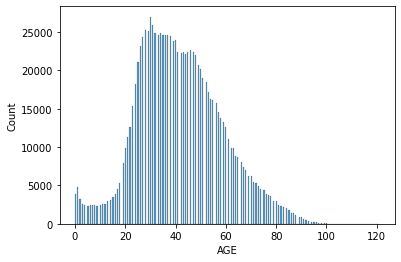

In [ ]:
# AGE distribution
sns.histplot(df.AGE);

In [ ]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'INTUBED', 'PNEUMONIA', 'AGE',
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'PATIENT_HOSP', 'COVID',
       'DEATH'],
      dtype='object')

In [ ]:
selected_columns = df.columns.drop('AGE','PREGNANT')

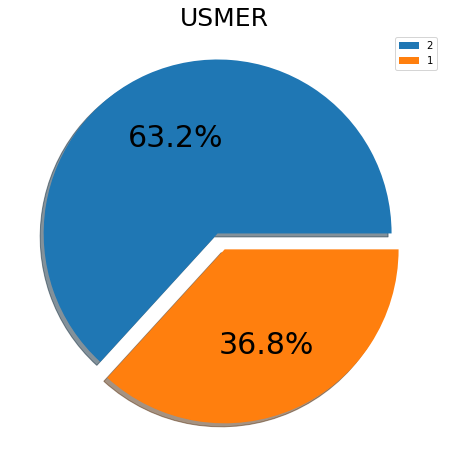

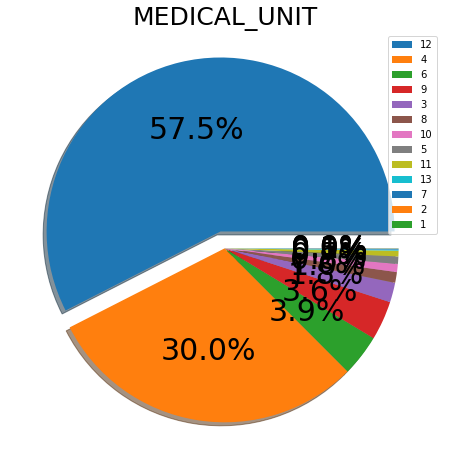

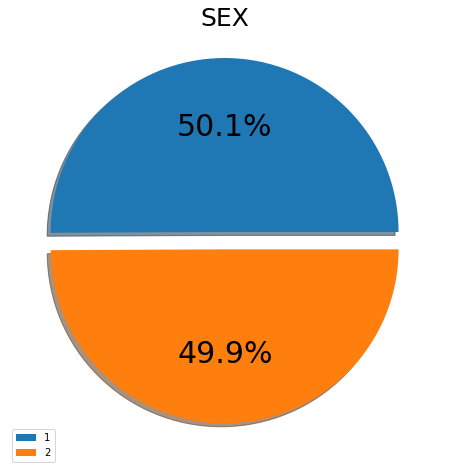

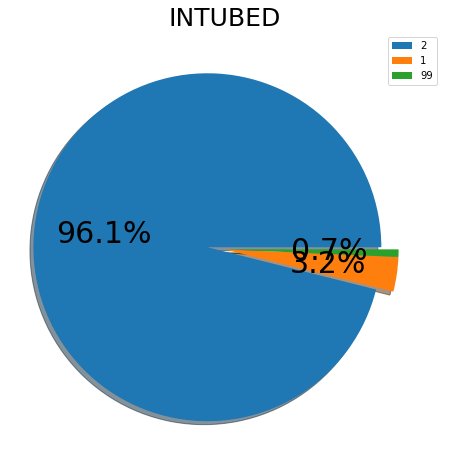

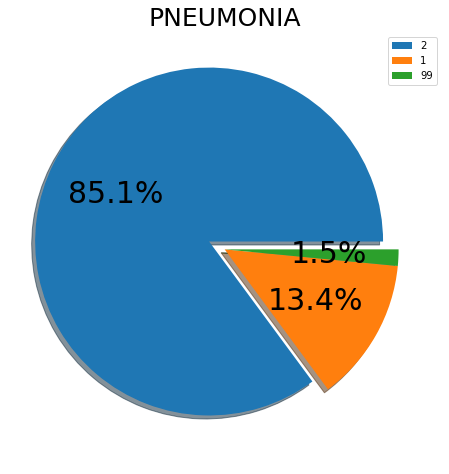

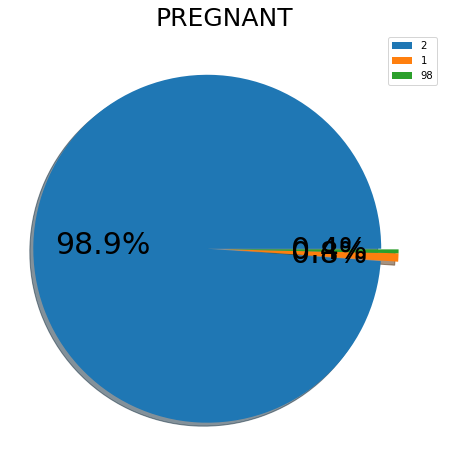

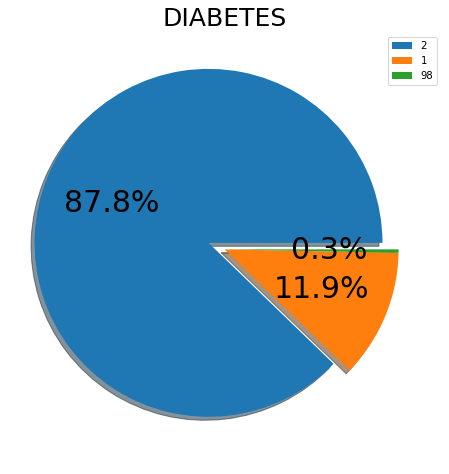

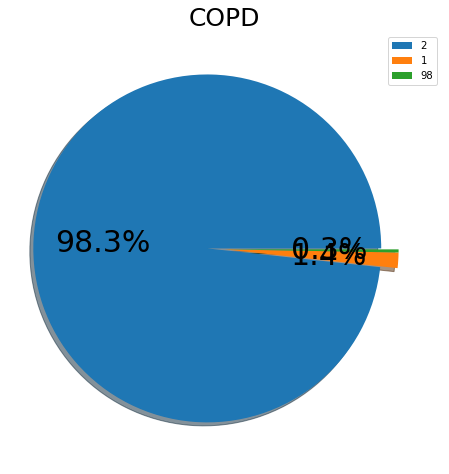

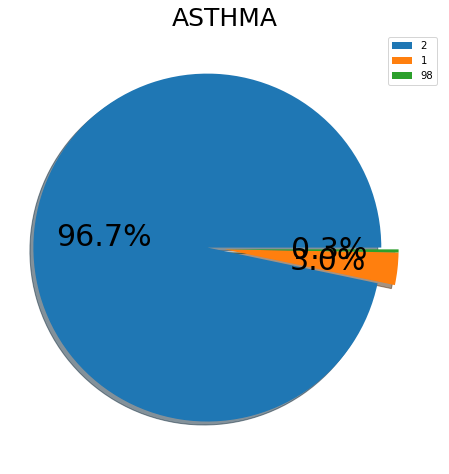

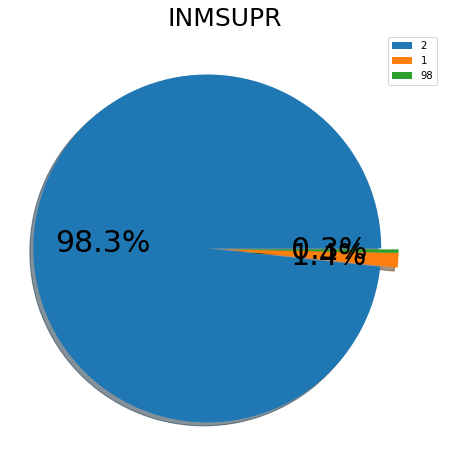

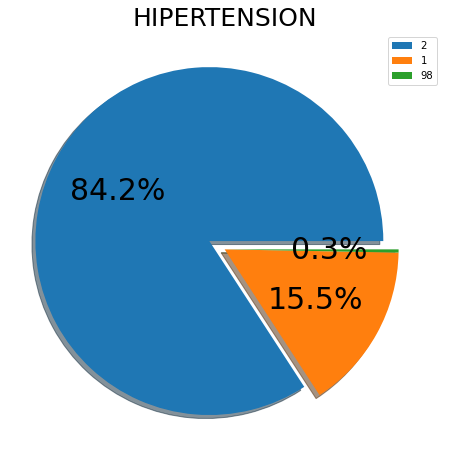

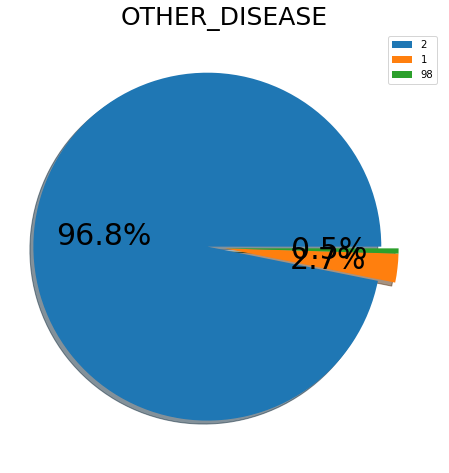

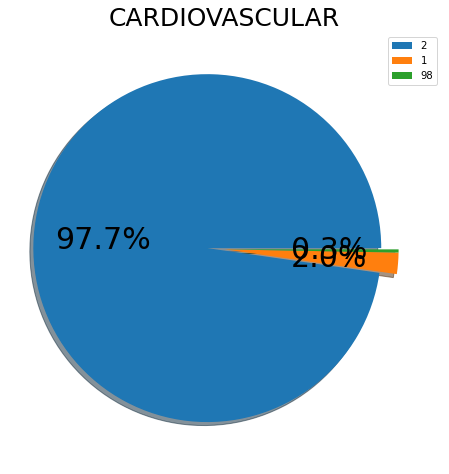

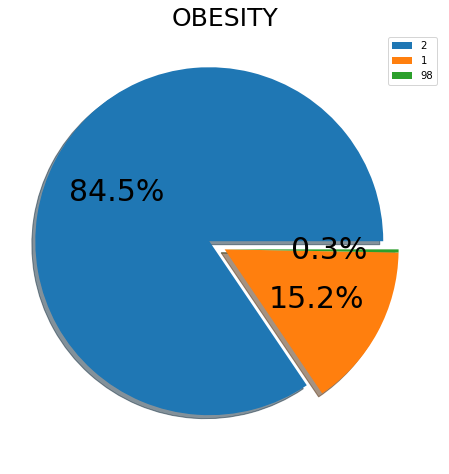

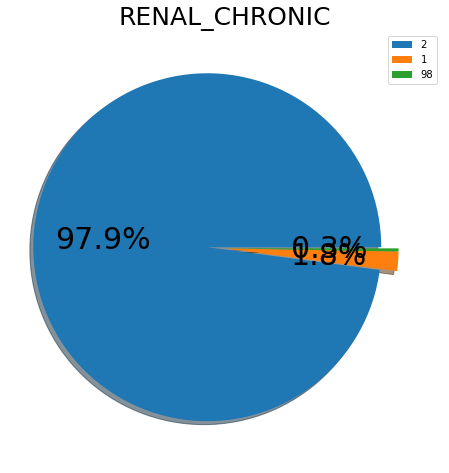

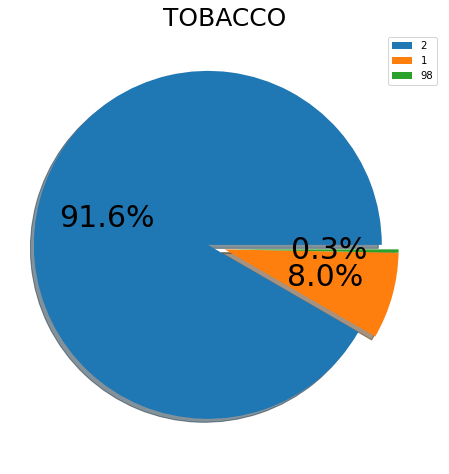

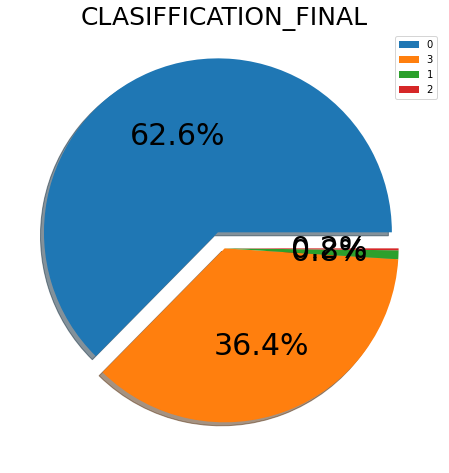

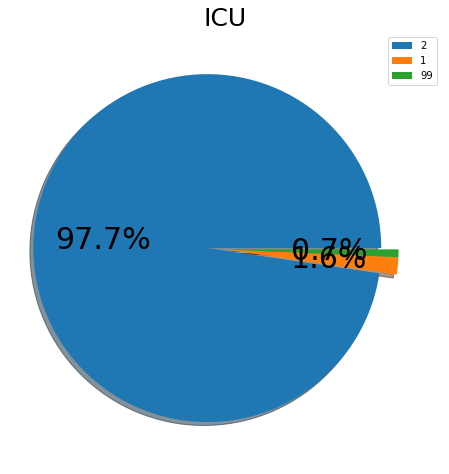

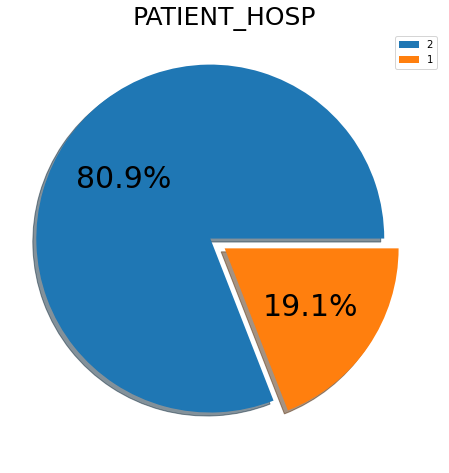

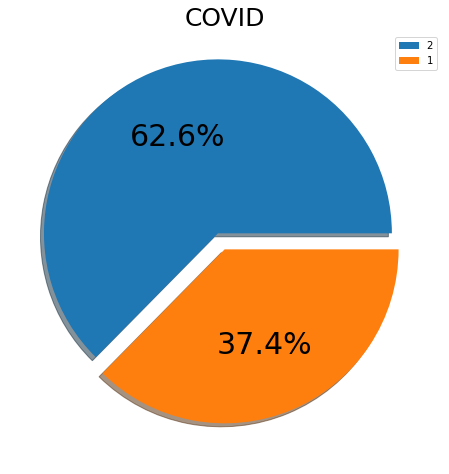

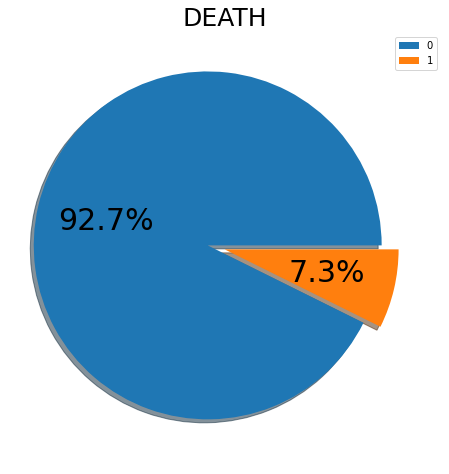

In [ ]:
# Creating Pie Plots for Categorical Features

for column in selected_columns:

  df_column = df[column].value_counts().sort_values(ascending = False)

  explode = [0] * (len(df[column].unique()))
  explode[0] = 0.1


  df_column.plot(kind = 'pie', subplots = True, autopct = '%1.1f%%', explode = explode, labeldistance = None,
                 legend ='best', shadow=True, ylabel= '', xlabel = '', figsize = (8, 8), fontsize = 30)
  
  plt.title(str(column), size = 25)

  plt.show()

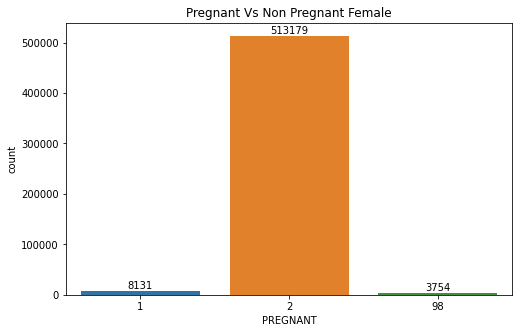

In [ ]:
# Plotting distribution of pregnancies within FEMALE 

df_female = df[df.SEX == 1]

plt.figure(figsize = (8,5))
ax = sns.countplot(df_female.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Pregnant Vs Non Pregnant Female", fontsize = 12);

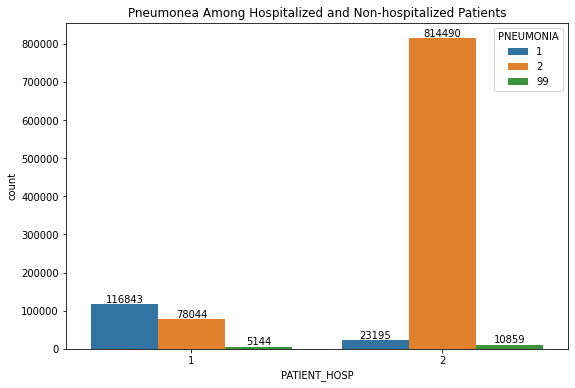

In [ ]:
# Plotting the distribution of pneumonea among hospitalized and non-hospitalized patients

plt.figure(figsize = (9,6))
ax = sns.countplot(df.PATIENT_HOSP, hue = df.PNEUMONIA)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Pneumonea Among Hospitalized and Non-hospitalized Patients");

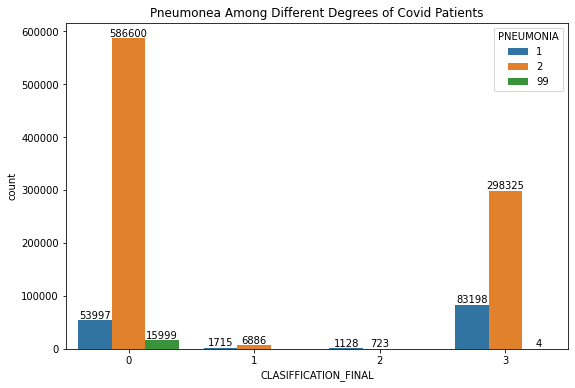

In [ ]:
# Plotting the distribution of pneumonea across different degrees of covid

plt.figure(figsize = (9,6))
ax = sns.countplot(df.CLASIFFICATION_FINAL, hue = df.PNEUMONIA)
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Pneumonea Among Different Degrees of Covid Patients");

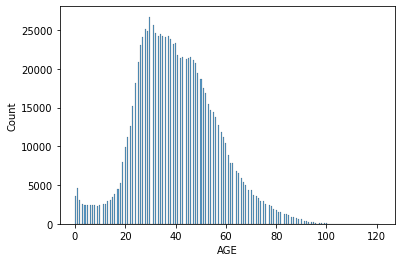

In [ ]:
# Distribution of Age within the dead patients.
sns.histplot(df.AGE[df.DEATH == 0]);

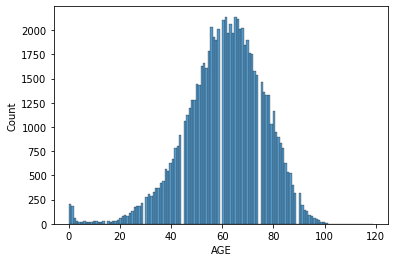

In [ ]:
# Distribution of Age within the recovered patients.
sns.histplot(df.AGE[df.DEATH == 1]);

In [ ]:
selected_columns = df.columns.drop(['DEATH','PREGNANT','AGE'])

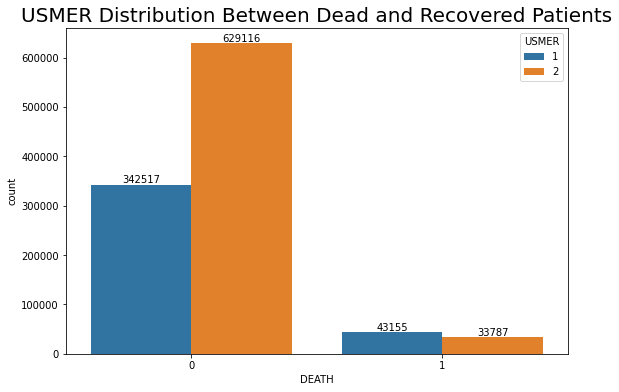

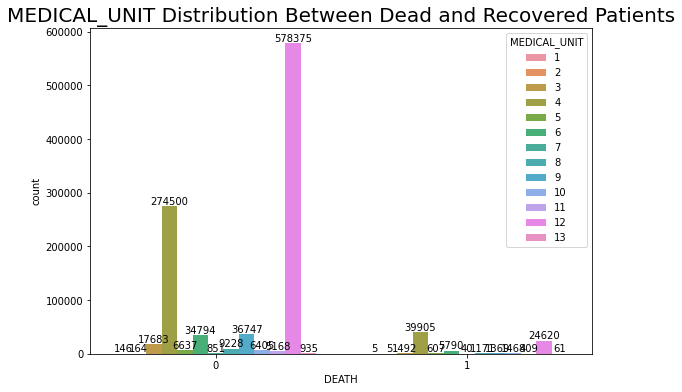

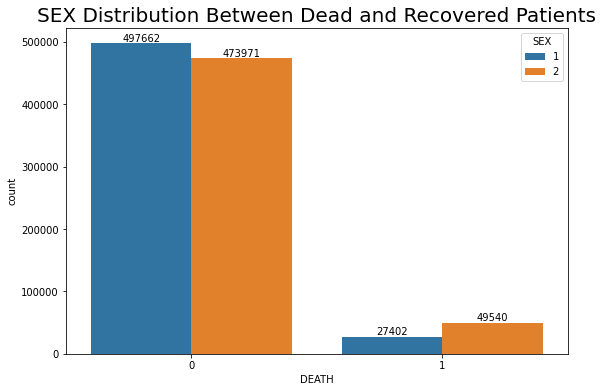

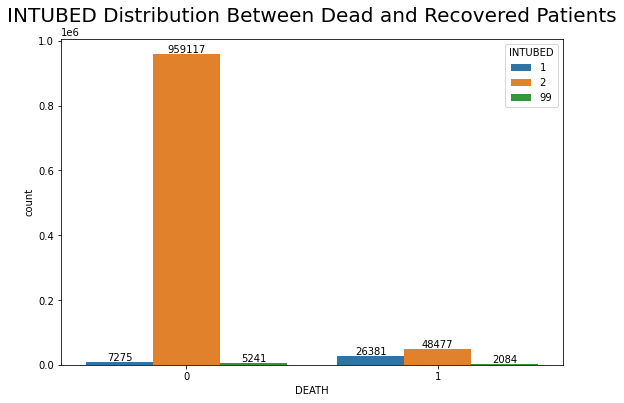

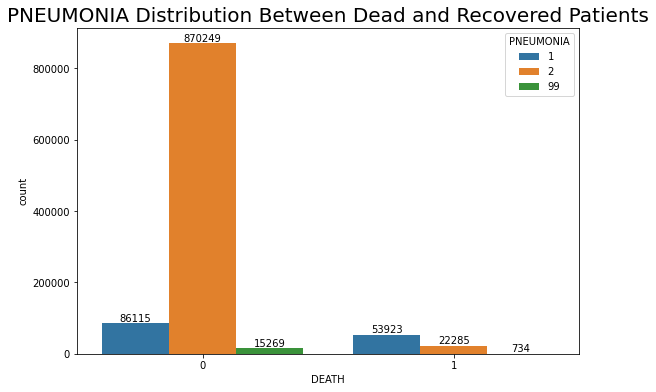

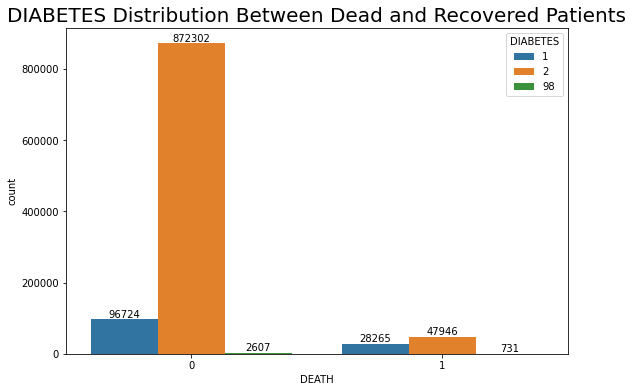

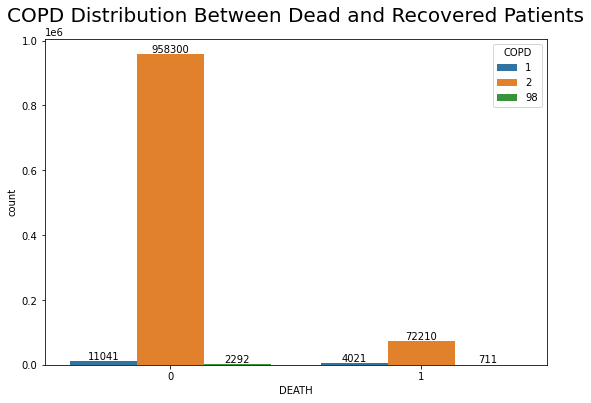

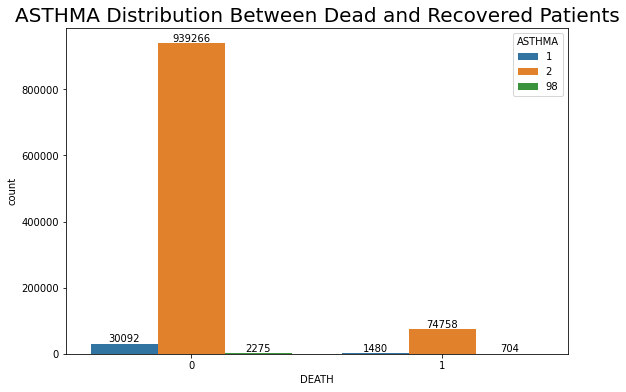

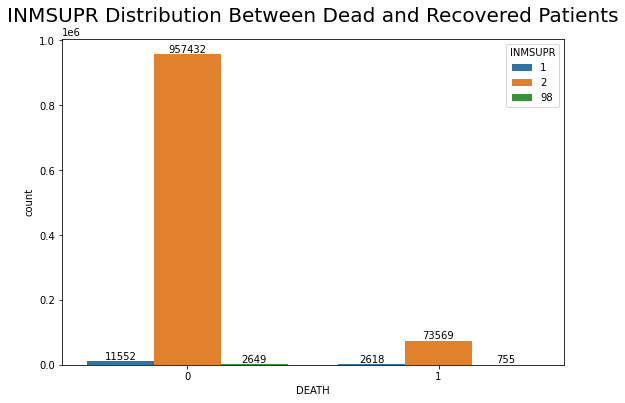

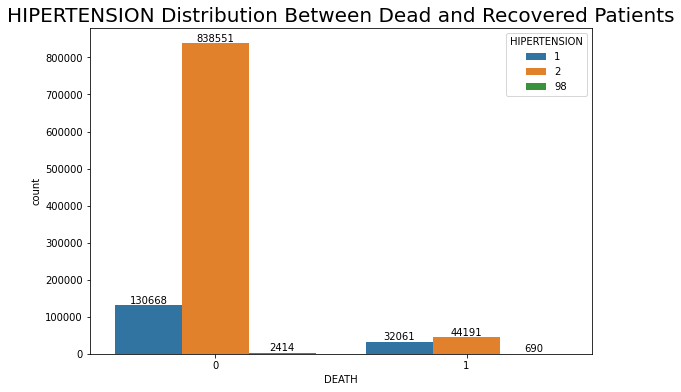

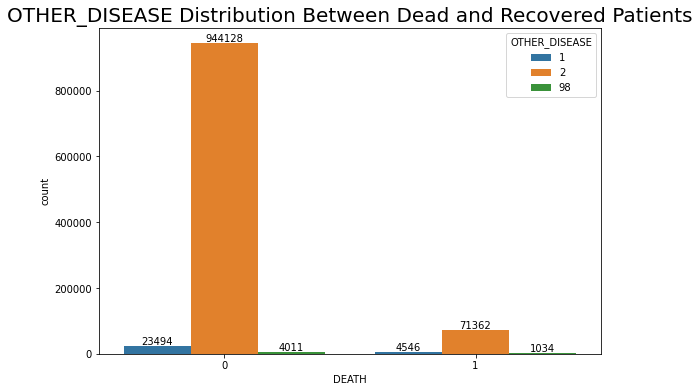

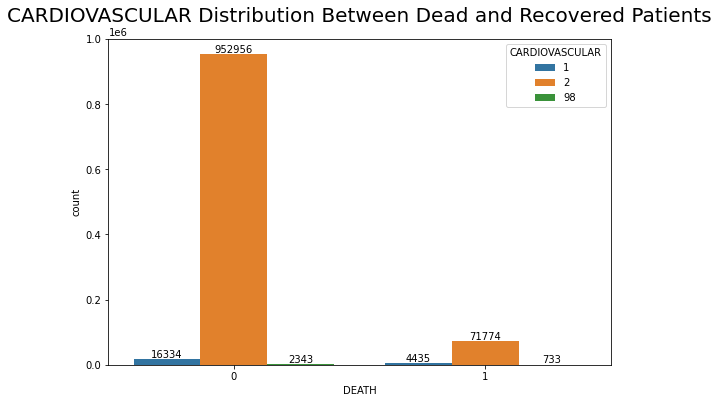

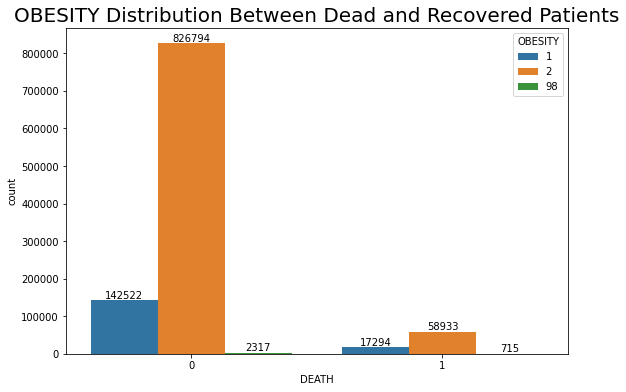

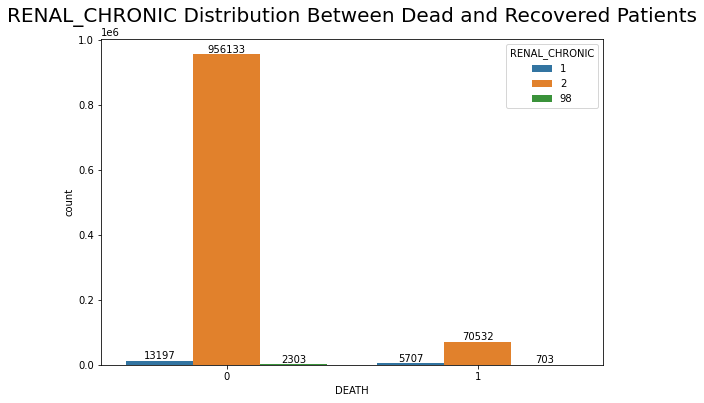

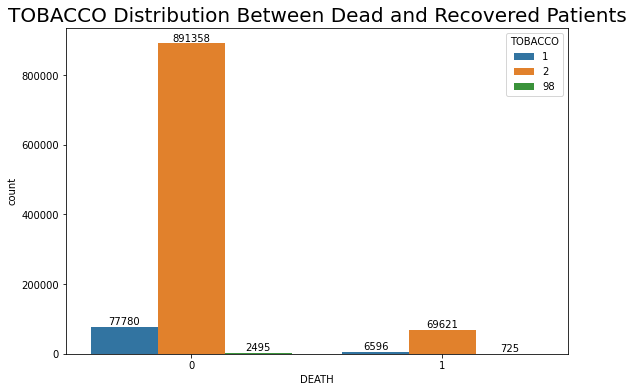

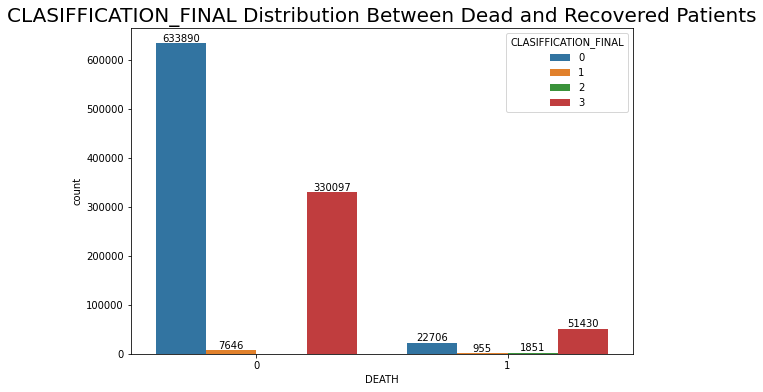

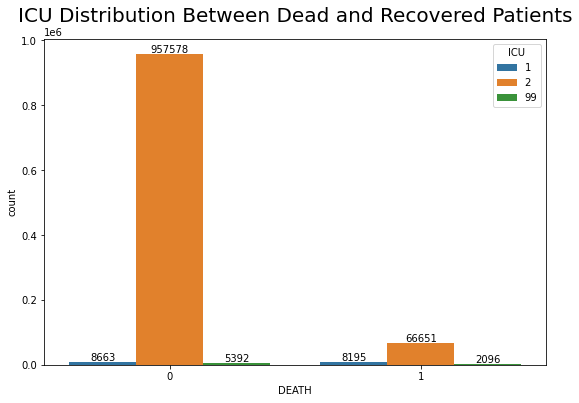

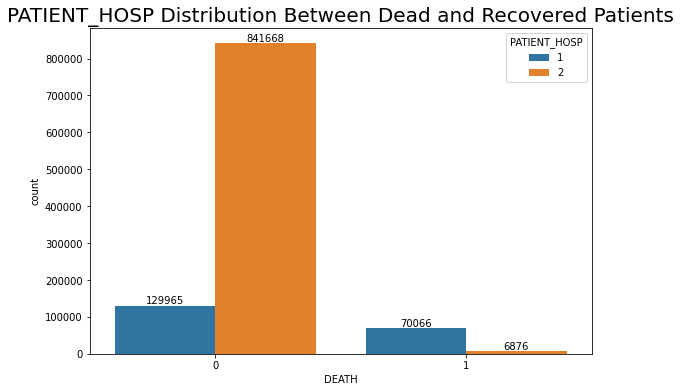

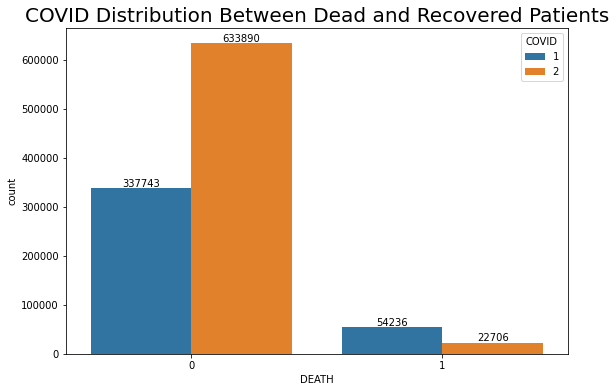

In [ ]:
# Show the distrubution of different features between dead and recovered patients.

for column in selected_columns:

  plt.figure(figsize = (9,6))
  ax = sns.countplot(df.DEATH, hue = df[column])
  for bars in ax.containers:
      ax.bar_label(bars)


  plt.title(str(column) + ' Distribution Between Dead and Recovered Patients', fontsize = 20);
  plt.show()

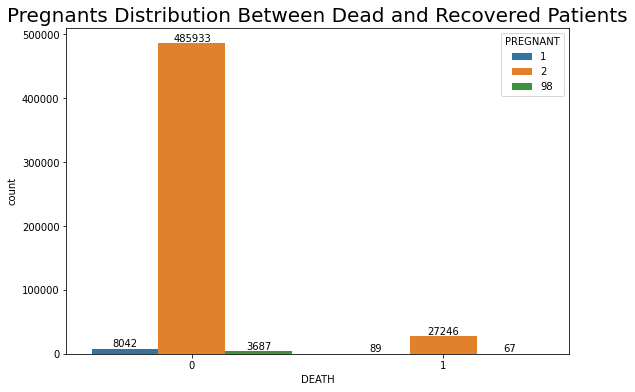

In [ ]:
# Show the distrubution of pregnants and non-pregnants women between dead and recovered patient


plt.figure(figsize = (9,6))
ax = sns.countplot(df_female.DEATH, hue = df_female.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)


plt.title( 'Pregnants Distribution Between Dead and Recovered Patients', fontsize = 20);
plt.show()

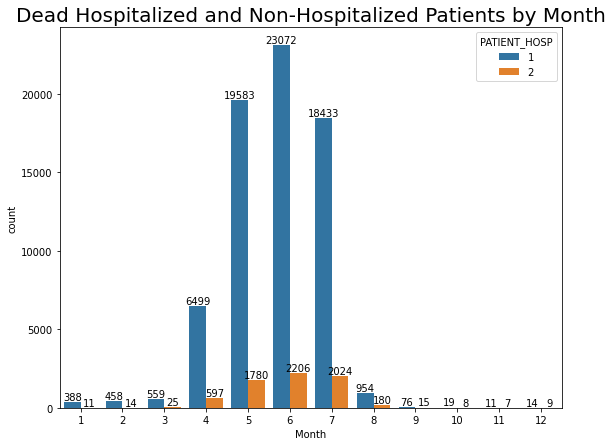

In [ ]:
# Plotting of Dead Hospitalized and Non-Hospitalized Patients by Month

plt.figure(figsize = (9,7))
ax = sns.countplot(x = "Month", hue = "PATIENT_HOSP", data = df_death)
plt.title("Dead Hospitalized and Non-Hospitalized Patients by Month", fontsize = 20)
for bars in ax.containers:
    ax.bar_label(bars)

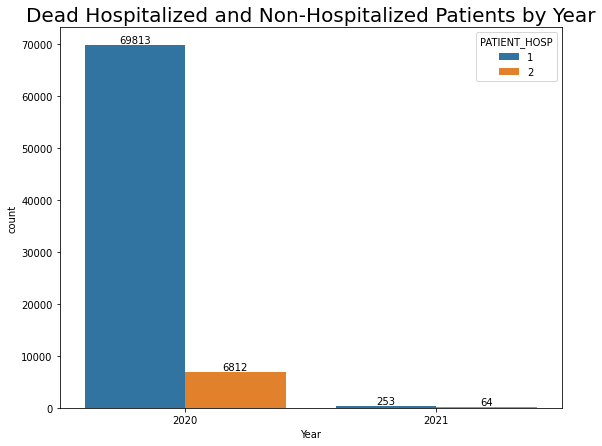

In [ ]:
# Plotting of Dead Hospitalized and Non-Hospitalized Patients by Year

plt.figure(figsize = (9,7))
ax = sns.countplot(x = "Year", hue = "PATIENT_HOSP", data = df_death)
plt.title("Dead Hospitalized and Non-Hospitalized Patients by Year", fontsize = 20)
for bars in ax.containers:
    ax.bar_label(bars)

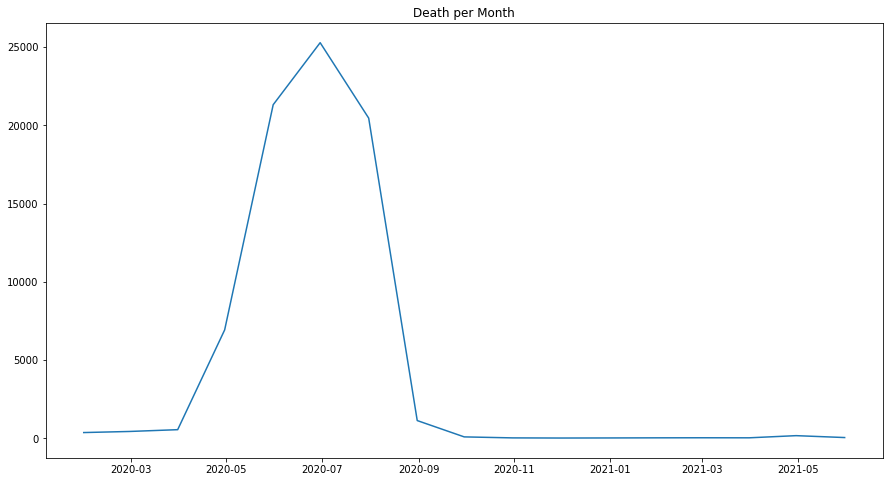

In [ ]:
# Death by time

time_data = df_death.resample('M', on = time_col)['DEATH'].count().fillna(0)

fig, ax = plt.subplots(figsize = (15,8))
ax.plot(time_data)
plt.title('Death per Month');

**- Dealing with (Medical_UNIT) Feature:**
- It seems that most people are in 12 or 4 type of medical units, may be they are the most available in Mexico.

- As long as we don't have any knowledge about these different types, we can't just combine them into 2 categories ex. (from 1 - 6) and from( 7-13)
- We don't think it's of clinical importance in identifieng the patient risk.
- We also have data on (usmr) whivch indicates Whether the patient treated medical units of the first, second or third level.
- Having dummies for 13 extra columns of Medical Units for around 1 M data points makes our data unable to be processed.
- So we will drop medical unit


In [ ]:
df.MEDICAL_UNIT.value_counts()

12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64

In [ ]:
df.drop('MEDICAL_UNIT', axis = 1, inplace = True)


# **5. Pre-processing:**

In [ ]:
df.columns

Index(['USMER', 'SEX', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES',
       'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
       'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO',
       'CLASIFFICATION_FINAL', 'ICU', 'PATIENT_HOSP', 'COVID', 'DEATH'],
      dtype='object')

In [ ]:
# Specifying X and Y

X = df.drop(['DEATH','COVID'],axis =1)
y= df['DEATH']

In [ ]:
# Split into test and train data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1)

In [ ]:
#check the shape

X_train.shape, X_test.shape

((838860, 19), (209715, 19))

In [ ]:
# Imputing missing data with mode
# Imputing test dataset with mode of train dataset to avoid overfitting

Features with null values:

- Pneumonia: 99 = 16003
- Diabetes: 98 = 3338
- Copd: 98 = 3003
- Asthma: 98 = 2979
- Inmsupr: 98 = 3404
- Hypertension: 98 = 3104
- Cardiovascular: 98 = 3076
- Renal chronic: 98 = 3006
- Other disease: 98 = 5045
- Obesity: 98 = 3032
- Tobacco: 98 = 3220
- Pregnancy: 98 = 3754
- Intubed: 99 = 7325
- ICU: 99 = 7488


In [ ]:
# Check count values before and after imputation
X_train.PNEUMONIA.value_counts()

2     714099
1     111975
99     12786
Name: PNEUMONIA, dtype: int64

In [ ]:
# Imputation of train dataset (No null values in y (Death))
# Don't impute AGE beacause we don't want to drop age = 99 or 98 as this is not null in AGE


selected_columns = X_train.columns.drop('AGE')

for column in selected_columns:
    X_train[column].replace(98, np.nan, inplace = True)
    X_train[column].replace(99, np.nan, inplace = True)
    X_test[column].replace(98, np.nan, inplace = True)
    X_test[column].replace(99, np.nan, inplace = True)

In [ ]:
X_train.isnull().sum()

USMER                       0
SEX                         0
INTUBED                  5854
PNEUMONIA               12786
AGE                         0
PREGNANT                 2994
DIABETES                 2671
COPD                     2401
ASTHMA                   2389
INMSUPR                  2732
HIPERTENSION             2473
OTHER_DISEASE            4063
CARDIOVASCULAR           2468
OBESITY                  2417
RENAL_CHRONIC            2408
TOBACCO                  2577
CLASIFFICATION_FINAL        0
ICU                      5985
PATIENT_HOSP                0
dtype: int64

In [ ]:
X_test.isnull().sum()

USMER                      0
SEX                        0
INTUBED                 1471
PNEUMONIA               3217
AGE                        0
PREGNANT                 760
DIABETES                 667
COPD                     602
ASTHMA                   590
INMSUPR                  672
HIPERTENSION             631
OTHER_DISEASE            982
CARDIOVASCULAR           608
OBESITY                  615
RENAL_CHRONIC            598
TOBACCO                  643
CLASIFFICATION_FINAL       0
ICU                     1503
PATIENT_HOSP               0
dtype: int64

In [ ]:
#Imputation of train dataset (No null values in y (Death))

for column in X_train.columns:
  X_train[column].fillna(X_train[column].mode()[0], inplace=True)

In [ ]:
#Imputation of test dataset (No null values in y (Death))

for column in X_test.columns:
  X_test[column].fillna(X_train[column].mode()[0], inplace=True)

In [ ]:
X_train.isnull().sum()

USMER                   0
SEX                     0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
PATIENT_HOSP            0
dtype: int64

In [ ]:
X_test.isnull().sum()

USMER                   0
SEX                     0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
PATIENT_HOSP            0
dtype: int64

In [ ]:
# Check count values before and after imputation
X_train.PNEUMONIA.value_counts()

2.0    726885
1.0    111975
Name: PNEUMONIA, dtype: int64

In [ ]:
# Ensure imputation
# All categories must show 2 unique values except CLASSIFICATION_FINAL, MEDICAL_UNIT

# Check Cardinality in Categorical Features

selected_columns = X_train.columns.drop(['AGE'])

unique_dic = []

for col in selected_columns:

  unique_num_train = len(X_train[col].unique())
  unique_num_test = len(X_test[col].unique())
  unique_dic.append({'Total_Unique_Train' : unique_num_train,
                     'Total_Unique_Test' : unique_num_test })

unique_df = pd.DataFrame(unique_dic, index = selected_columns).sort_values(by = 'Total_Unique_Train', ascending = False)
unique_df

,Total_Unique_Train,Total_Unique_Test
CLASIFFICATION_FINAL,4,4
USMER,2,2
SEX,2,2
ICU,2,2
TOBACCO,2,2
RENAL_CHRONIC,2,2
OBESITY,2,2
CARDIOVASCULAR,2,2
OTHER_DISEASE,2,2
HIPERTENSION,2,2


In [ ]:
# !pip install imblearn

In [ ]:
# from imblearn.under_sampling import NearMiss
# nr = NearMiss()

# X_train, y_train = nr.fit_resample(X_train, y_train)

In [ ]:
# Use  SMOTE (synthetic minority oversampling technique) 

# from imblearn.over_sampling import SMOTE
# sm = SMOTE()
# X_train, y_train = sm.fit_resample(X_train, y_train)

# MemoryError: Unable to allocate 68.5 GiB for an array with shape (47277, 1554690) and data type uint8

In [ ]:
# Get dummies dataframe for categorical data

numerical_train = X_train[['AGE']]
ordinal_train = X_train[['CLASIFFICATION_FINAL','USMER']]
categorical_train = X_train.drop(['AGE', 'CLASIFFICATION_FINAL','USMER'], axis = 1)

In [ ]:
# Get dummies dataframe for categorical data

dummies_list = []

for column in categorical_train.columns:
  col_dummies = pd.get_dummies(X_train[column], drop_first = True)
  dummies_list.append(col_dummies)

dummies_df = pd.concat(dummies_list, axis=1)

In [ ]:
dummies_df

,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
656253,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0
329191,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
557768,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
93060,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
558339,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491263,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
791624,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1
470924,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
491755,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
#Get dataframe for other features
num_ord_df = pd.concat([numerical_train, ordinal_train], axis =1)

In [ ]:
num_ord_df

,AGE,CLASIFFICATION_FINAL,USMER
656253,59,3,1
329191,25,0,2
557768,37,3,1
93060,25,3,2
558339,34,3,2
...,...,...,...
491263,63,3,2
791624,46,0,2
470924,57,1,2
491755,30,3,2


In [ ]:
# # Add all features back to X_train
X_train = pd.merge(num_ord_df, dummies_df, left_index=True, right_index=True)

X_train

,AGE,CLASIFFICATION_FINAL,USMER,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
656253,59,3,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0
329191,25,0,2,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
557768,37,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
93060,25,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
558339,34,3,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491263,63,3,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
791624,46,0,2,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1
470924,57,1,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
491755,30,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Same steps for X_test

numerical_test = X_test[['AGE']]
ordinal_test = X_test[['CLASIFFICATION_FINAL','USMER']]
categorical_test = X_test.drop(['AGE', 'CLASIFFICATION_FINAL','USMER'], axis = 1)


In [ ]:
# Get dummies dataframe for categorical data

dummies_list_test = []

for column in categorical_test.columns:
  col_dummies = pd.get_dummies(X_test[column], drop_first = True)
  dummies_list_test.append(col_dummies)

dummies_df_test = pd.concat(dummies_list_test, axis=1)

In [ ]:
# Get dataframe for other features
num_ord_df_test = pd.concat([numerical_test, ordinal_test], axis =1)

In [ ]:
# Add all features back to X_train
X_test = pd.merge(num_ord_df_test, dummies_df_test, left_index=True, right_index=True)

X_test

,AGE,CLASIFFICATION_FINAL,USMER,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1045953,46,0,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
358409,35,3,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
875012,36,0,2,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
555046,27,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
272972,22,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181305,30,0,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
672605,29,0,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
718823,68,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1006146,54,0,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


# **6. Logistic Regression**

## **i. Model Training**

In [ ]:
# Model training 
# we will use solver = saga as we have a large dataset
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='saga', random_state=0)

logreg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=0, solver='saga')

In [ ]:
#test data
y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

## **ii. Validation Metrics**

### **a. Accuracy**

In [ ]:
#check for accuracy 

from sklearn.metrics import accuracy_score

print('Model accuracy score(test): ', accuracy_score(y_test, y_pred_test))
print('Model accuracy score(train): ', accuracy_score(y_train, y_pred_train))

Model accuracy score(test):  0.9472951386405359
Model accuracy score(train):  0.9471890422716543


### **b. Null Accuracy**

In [ ]:
y_test.value_counts()

0    194288
1     15427
Name: DEATH, dtype: int64

In [ ]:
null_acuracy = 194288/(len(y_test))
null_acuracy

0.9264382614500631

In [ ]:
# null accuracy is less than our actual accuracy, hence, our model is not just predicting 
# the most frequent value

### **c. Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred_test)

In [ ]:
print('True Negatives (TN) = ', cm[0,0])
print('False Positives (FP)= ', cm[0, 1])
print('False Negatives (FN)= ', cm[1, 0])
print('True Positives (TP))= ', cm[1, 1])

True Negatives (TN) =  191105
False positives (FP)=  3183
False Negatives (FN)=  7870
True Positives (TP))=  7557


In [ ]:
# Visualze with heatmap
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

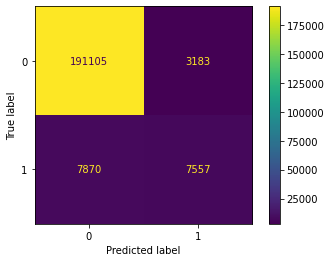

In [ ]:
disp.plot();

### **d. Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    194288
           1       0.70      0.49      0.58     15427

    accuracy                           0.95    209715
   macro avg       0.83      0.74      0.77    209715
weighted avg       0.94      0.95      0.94    209715



### **e. ROC, AUC**

In [ ]:
#probability of getting 0, i.e , Death
#probability of getting 1, i.e , Recovery

y_pred0 = logreg.predict_proba(X_test)[:,0]
y_pred1 = logreg.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label=1)

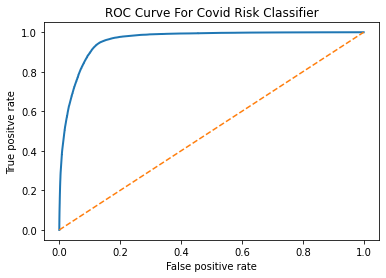

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], '--')
plt.title('ROC Curve For Covid Risk Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.show()



In [ ]:
#computing AUC 

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print(ROC_AUC)

0.9594526487596136


# **7. Random Forest Classifier:**

## **i. Model Training**

In [ ]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

## **ii. Validation Metrics**

### **a. Accuracy**

In [ ]:
#check for accuracy 

from sklearn.metrics import accuracy_score

print('Model accuracy score(test): ', accuracy_score(y_test, y_pred_test))
print('Model accuracy score(train): ', accuracy_score(y_train, y_pred_train))

### **b. Null Accuracy**

In [ ]:
y_test.value_counts()

In [ ]:
null_acuracy = 194288/(len(y_test))
null_acuracy

In [ ]:
# null accuracy is less than our actual accuracy, hence, our model is not just predicting 
# the most frequent value

### **c. Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred_test)

In [ ]:
print('True Negatives (TN) = ', cm[0,0])
print('False positives (FP)= ', cm[0, 1])
print('False Negatives (FN)= ', cm[1, 0])
print('True Positives (TP))= ', cm[1, 1])

In [ ]:
# Visualze with heatmap
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

In [ ]:
disp.plot();

### **d. Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

### **e. ROC, AUC**

In [ ]:
#probability of getting 0, i.e , Death
#probability of getting 1, i.e , Recovery

y_pred0 = logreg.predict_proba(X_test)[:,0]
y_pred1 = logreg.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label=1)

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], '--')
plt.title('ROC Curve For Covid Risk Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.show()



In [ ]:
#computing AUC 

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print(ROC_AUC)

# **8. Naive Bayes Classifiers:**

## **i. Model Training**

In [ ]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train) 

In [ ]:
# making predictions on the testing set

y_pred_test = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)

## **ii. Validation Metrics**

### **a. Accuracy**

In [ ]:
#check for accuracy 

from sklearn.metrics import accuracy_score

print('Model accuracy score(test): ', accuracy_score(y_test, y_pred_test))
print('Model accuracy score(train): ', accuracy_score(y_train, y_pred_train))

### **b. Null Accuracy**

In [ ]:
y_test.value_counts()

In [ ]:
null_acuracy = 194288/(len(y_test))
null_acuracy

In [ ]:
# null accuracy is more than our actual accuracy, hence, our model may be just predicting 
# the most frequent value

### **c. Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred_test)

In [ ]:
print('True Negatives (TN) = ', cm[0,0])
print('False positives (FP)= ', cm[0, 1])
print('False Negatives (FN)= ', cm[1, 0])
print('True Positives (TP))= ', cm[1, 1])

In [ ]:
# Visualze with heatmap
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

In [ ]:
disp.plot();

### **d. Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

### **e. ROC, AUC**

In [ ]:
#probability of getting 0, i.e , Death
#probability of getting 1, i.e , Recovery

y_pred0 = logreg.predict_proba(X_test)[:,0]
y_pred1 = logreg.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label=1)

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], '--')
plt.title('ROC Curve For Covid Risk Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.show()



In [ ]:
#computing AUC 

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print(ROC_AUC)

# **9. SGD (Stochastic Gradient Descent) Classifier:**

## **i. Model Training**

In [ ]:
# training the model on training set

from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="perceptron", penalty="l2")
clf.fit(X_train, y_train)


SGDClassifier(loss='perceptron')

In [ ]:
X_train

,AGE,CLASIFFICATION_FINAL,USMER,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
656253,59,3,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0
329191,25,0,2,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
557768,37,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
93060,25,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
558339,34,3,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491263,63,3,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
791624,46,0,2,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1
470924,57,1,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
491755,30,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# making predictions on the testing set

y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

## **ii. Validation Metrics**

### **a. Accuracy**

In [ ]:
#check for accuracy 

from sklearn.metrics import accuracy_score

print('Model accuracy score(test): ', accuracy_score(y_test, y_pred_test))
print('Model accuracy score(train): ', accuracy_score(y_train, y_pred_train))

Model accuracy score(test):  0.9195193476861455
Model accuracy score(train):  0.918519180792981


### **b. Null Accuracy**

In [ ]:
y_test.value_counts()

0    194288
1     15427
Name: DEATH, dtype: int64

In [ ]:
null_acuracy = 194288/(len(y_test))
null_acuracy

0.9264382614500631

In [ ]:
# null accuracy is less than our actual accuracy, hence, our model is not just predicting 
# the most frequent value

### **c. Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred_test)

In [ ]:
print('True Negatives (TN) = ', cm[0,0])
print('False positives (FP)= ', cm[0, 1])
print('False Negatives (FN)= ', cm[1, 0])
print('True Positives (TP))= ', cm[1, 1])

True Negatives (TN) =  181814
False positives (FP)=  12474
False Negatives (FN)=  4404
True Positives (TP))=  11023


In [ ]:
# Visualze with heatmap
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

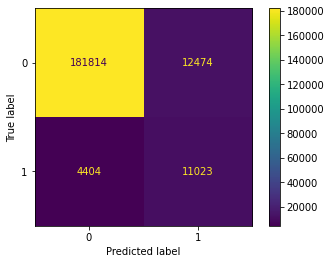

In [ ]:
disp.plot();

### **d. Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96    194288
           1       0.47      0.71      0.57     15427

    accuracy                           0.92    209715
   macro avg       0.72      0.83      0.76    209715
weighted avg       0.94      0.92      0.93    209715



### **e. ROC, AUC**

In [ ]:
#probability of getting 0, i.e , Death
#probability of getting 1, i.e , Recovery

y_pred0 = logreg.predict_proba(X_test)[:,0]
y_pred1 = logreg.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label=1)

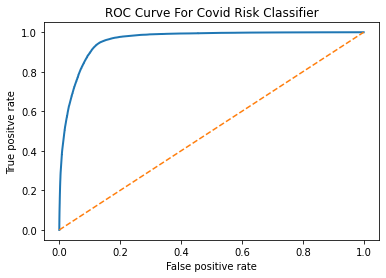

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], '--')
plt.title('ROC Curve For Covid Risk Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.show()



In [ ]:
#computing AUC 

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print(ROC_AUC)

0.9594526487596136


# **10. Support Vector Machine (SVM):**

## **i. Model Training**

In [ ]:
from sklearn.svm import SVC
svc_model= SVC(kernel = 'linear')
svc_model.fit(X_train, y_train)
prediction= svc_model.predict(X_test)

In [ ]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

In [ ]:
print('Confusion Matrix: \n',
     confusion_matrix(prediction, y_test))

## **ii. Validation Metrics**

### **a. Accuracy**

In [ ]:
#check for accuracy 

from sklearn.metrics import accuracy_score

print('Model accuracy score(test): ', accuracy_score(y_test, y_pred_test))
print('Model accuracy score(train): ', accuracy_score(y_train, y_pred_train))

### **b. Null Accuracy**

In [ ]:
y_test.value_counts()

In [ ]:
null_acuracy = 194288/(len(y_test))
null_acuracy

In [ ]:
# null accuracy is less than our actual accuracy, hence, our model is not just predicting 
# the most frequent value

### **c. Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred_test)

In [ ]:
print('True Negatives (TN) = ', cm[0,0])
print('False positives (FP)= ', cm[0, 1])
print('False Negatives (FN)= ', cm[1, 0])
print('True Positives (TP))= ', cm[1, 1])

In [ ]:
# Visualze with heatmap
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

In [ ]:
disp.plot();

### **d. Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

### **e. ROC, AUC**

In [ ]:
#probability of getting 0, i.e , Death
#probability of getting 1, i.e , Recovery

y_pred0 = logreg.predict_proba(X_test)[:,0]
y_pred1 = logreg.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label=1)

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], '--')
plt.title('ROC Curve For Covid Risk Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.show()



In [ ]:
#computing AUC 

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print(ROC_AUC)